In [7]:
# -*- coding: utf-8 -*-
"""
Created on Fri Mar  6 15:29:45 2020

@author: Subham
"""



# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.utils import np_utils
from xgboost import XGBClassifier


# Importing the dataset
dataset = pd.read_csv('train.csv')
X = dataset.iloc[:, 0:10].values #taking indexes from 1st to 9th one barring defcon level and id
y = dataset.iloc[:, 10:11].values # penultimate column storing class

np.unique(y)


# Importing the test dataset
dataset_test = pd.read_csv('test.csv')

X_final=dataset_test.iloc[:, 0:10].values;
ids=dataset_test.iloc[:, 10:11].values;


In [8]:
dataset.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3,5946
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2,9054


1


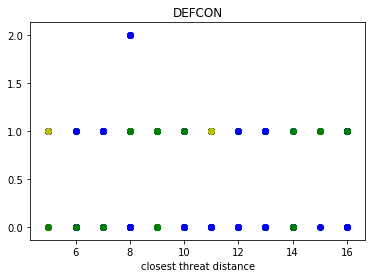

2


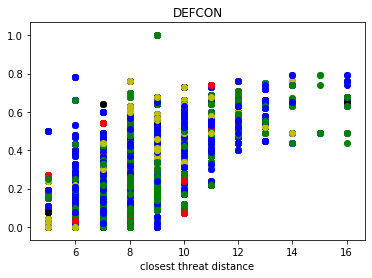

3


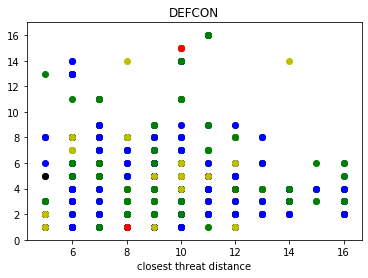

4


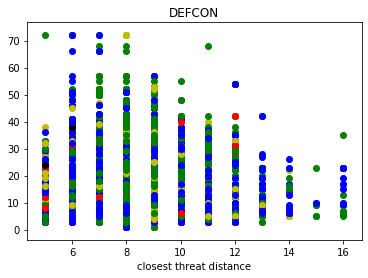

5


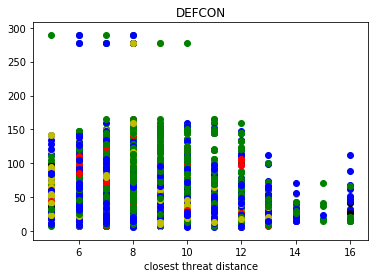

6


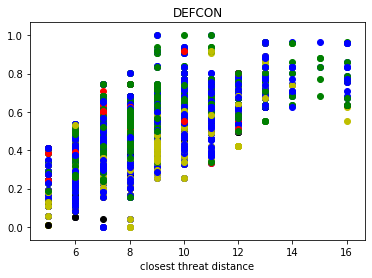

7


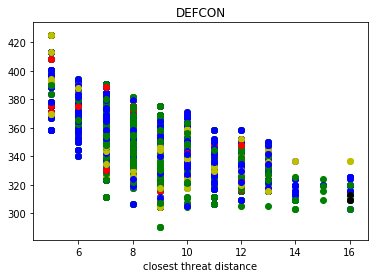

8


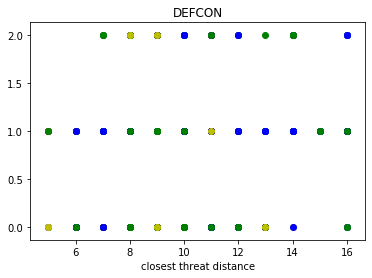

9


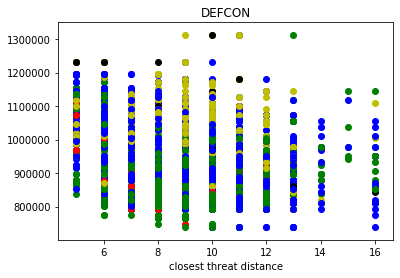

In [5]:

#visualization w.r.t AlliedNations
import matplotlib.pyplot as plt
colors={1:'r',2:'g',3:'b',4:'y',5:'k'}

for k in range(1,10):
    xp=[]
    yp=[]
    print(k);
    for i in range(10000):
        xp.append(X[i][0])
        yp.append(X[i][k])


    fig, ax = plt.subplots()
    for i in range(10000):
        ax.scatter(xp[i],yp[i],color=colors[y[i][0]])

    ax.set_title('DEFCON')
    ax.set_xlabel('Allied Nations')
    #ax.set_ylabel('troops mobilized')

    plt.show()

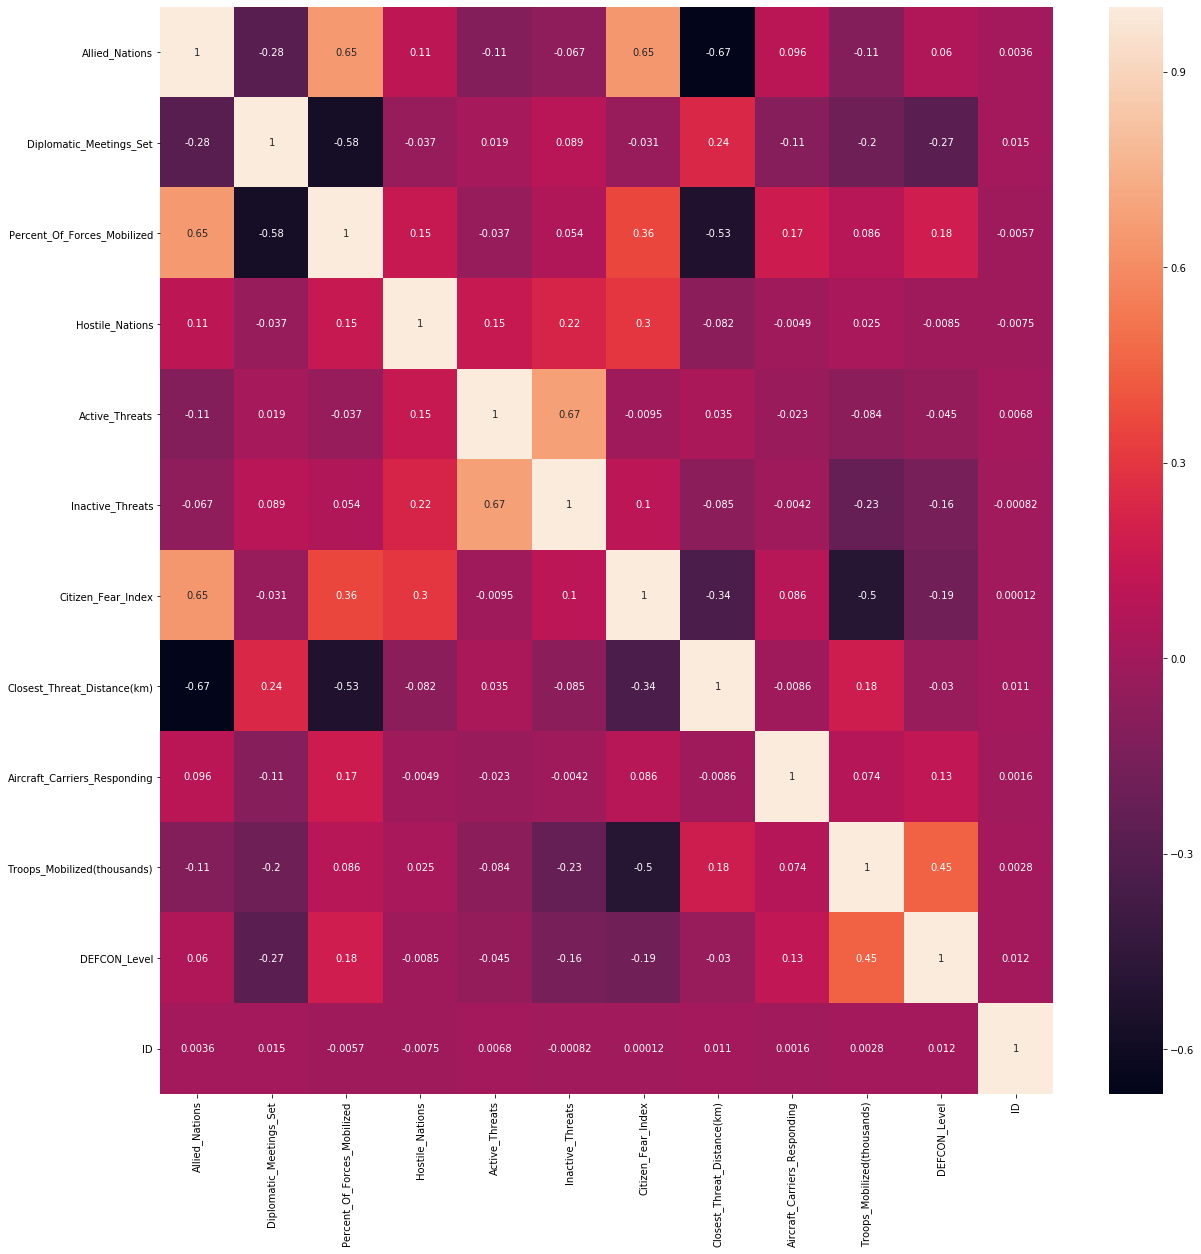

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat=dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True)

0


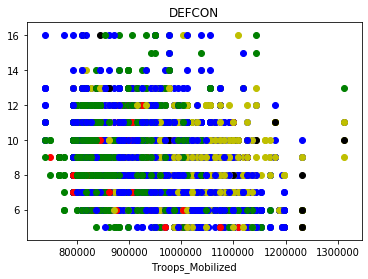

1


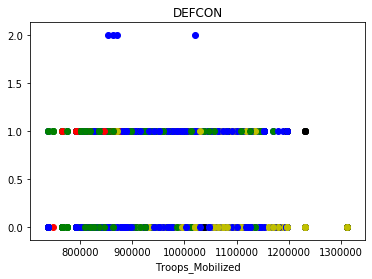

2


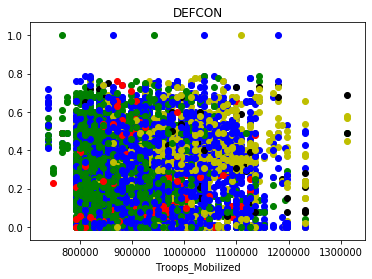

3


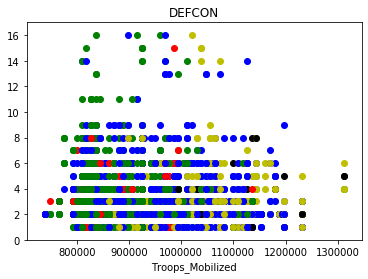

4


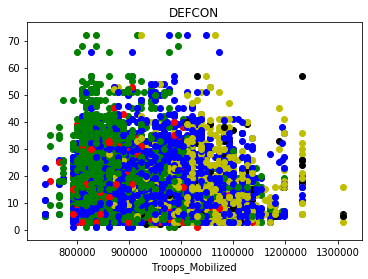

5


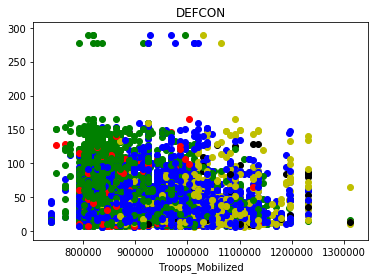

6


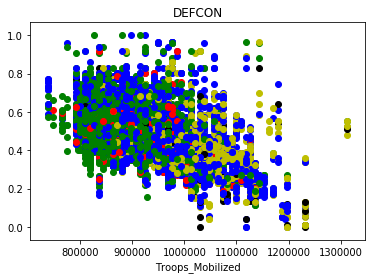

7


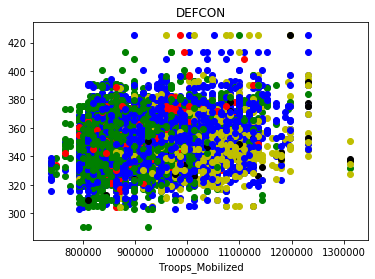

8


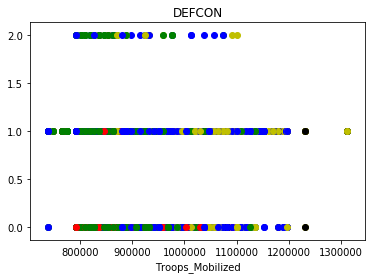

In [6]:

#visualization w.r.t Troops_Mobilized
import matplotlib.pyplot as plt
colors={1:'r',2:'g',3:'b',4:'y',5:'k'}

for k in range(0,9):
    xp=[]
    yp=[]
    print(k);
    for i in range(10000):
        xp.append(X[i][9])
        yp.append(X[i][k])


    fig, ax = plt.subplots()
    for i in range(10000):
        ax.scatter(xp[i],yp[i],color=colors[y[i][0]])

    ax.set_title('DEFCON')
    ax.set_xlabel('Troops_Mobilized')
    #ax.set_ylabel('troops mobilized')

    plt.show()

## Testing Random Forest Model

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 130) #test on 2000 observations and train on 8000


model=RandomForestClassifier(n_estimators=300,max_depth=100,max_features=10, min_samples_leaf=3, min_samples_split=8);
print(model)
model.fit(X_train,y_train);

#predictions
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
 #56

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


F:\Udemy\Anaconda\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


0.9014444444444445
0.649


In [9]:
sev=[];
for i in range(2500):
    lt=[]
    for k in range(10):
        lt.append(X_final[i][k])
    ans=model.predict(np.array([lt]))
    
    sev.append((ids[i],ans[0]));
        
answers=[]


for i in range(2500):
    answers.append(sev[i][1]);

In [10]:
print(answers)

[3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 2, 2, 4, 2, 3, 4, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 4, 2, 3, 2, 2, 2, 2, 3, 2, 4, 2, 4, 3, 2, 1, 4, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 4, 2, 2, 3, 2, 2, 4, 2, 3, 4, 3, 3, 2, 3, 3, 2, 3, 3, 4, 2, 4, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 1, 2, 2, 4, 3, 3, 1, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 4, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 1, 2, 2, 2, 3, 4, 2, 3, 4, 4, 4, 3, 3, 4, 3, 3, 2, 1, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 4, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 4, 3, 3, 2, 3, 2, 2, 3, 3, 3, 1, 3, 3, 2, 2, 2, 2, 1, 4, 2, 2, 2, 2, 2, 3, 1, 2, 3, 3, 3, 2, 3, 3, 

In [11]:
data_to_submit = pd.DataFrame({
'ID':dataset_test['ID'],
    'DEFCON_Level':answers
})
data_to_submit.to_csv('submission_1.csv', index = False)

### Selecting best XGBoost model

In [82]:
params={"n_estimators":[15,20,25,30,50,75,100],
    "learning_rate":[0.05,0.1,0.15,0.2,0.25,0.3],
       "max_depth":[3,4,5,6,7,8,9],
       "min_child_weight": [1,3,5,7,9],
       "gamma": [0.0,0.1,0.2,0.3,0.4],
       "colsample_bytree": [0.3,0.4, 0.5,0.7]}

In [83]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

model = XGBClassifier()
random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,cv=5,n_jobs=-1,scoring="accuracy",verbose=3)
random_search.fit(X,y);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.6s finished
F:\Udemy\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Udemy\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=9, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [85]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

scores_accuracy = []

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=None)
for tr_idx, va_idx in kf.split(X,y):
    tr_x,va_x = X[tr_idx], X[va_idx]
    tr_y,va_y = y[tr_idx], y[va_idx]

    model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=9, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
    
    model.fit(tr_x,tr_y)

    pred=model.predict(va_x)
    accuracy = accuracy_score(va_y, pred)

    scores_accuracy.append(accuracy)

F:\Udemy\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Udemy\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
print(scores_accuracy)

[0.5922038980509745, 0.6016991504247876, 0.606, 0.6213106553276638, 0.6028014007003502]


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = None)
model.fit(X_train,y_train);

#predictions
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8762222222222222
0.592


In [87]:
sev=[];
for i in range(2500):
    lt=[]
    for k in range(10):
        lt.append(X_final[i][k])
    ans=model.predict(np.array([lt]))
    
    sev.append((ids[i],ans[0]));
        
answers=[]


for i in range(2500):
    answers.append(sev[i][1]);

In [88]:
data_to_submit = pd.DataFrame({
'ID':dataset_test['ID'],
    'DEFCON_Level':answers
})
data_to_submit.to_csv('submission_3.csv', index = False)

In [2]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

### Selecting best SVM model

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
C=[1,2,3,4,5,6,7,8,9,10]
acc_score=[]
for c in C:
    model = svm.SVC(kernel="linear",C=c)
    scores = cross_val_score(model, X_scaled, y.ravel(), cv=10, scoring='accuracy')
    acc_score.append((c,scores.mean()))
    print(scores)
print(acc_score)

[0.53046953 0.54945055 0.549      0.527      0.559      0.545
 0.537      0.539      0.55555556 0.54254254]
[0.53046953 0.54945055 0.549      0.527      0.559      0.545
 0.537      0.539      0.55555556 0.54254254]
[0.53046953 0.54945055 0.549      0.528      0.559      0.545
 0.537      0.539      0.55555556 0.54254254]
[0.53046953 0.54945055 0.549      0.527      0.559      0.545
 0.537      0.539      0.55555556 0.54254254]
[0.53046953 0.54945055 0.549      0.527      0.559      0.545
 0.537      0.539      0.55555556 0.54254254]
[0.53046953 0.54945055 0.549      0.527      0.559      0.545
 0.538      0.539      0.55555556 0.54254254]
[0.53046953 0.54945055 0.549      0.527      0.559      0.545
 0.538      0.539      0.55555556 0.54254254]
[0.53046953 0.54945055 0.549      0.527      0.559      0.545
 0.538      0.539      0.55655656 0.54254254]
[0.53046953 0.54945055 0.549      0.527      0.559      0.545
 0.538      0.539      0.55655656 0.54254254]
[0.53046953 0.54945055 0.549

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
gammas=[0.01,0.1,1,10,100]
acc_score=[]
for g in gammas:
    model = svm.SVC(kernel="rbf",gamma=g)
    scores = cross_val_score(model, X_scaled, y.ravel(), cv=10, scoring='accuracy')
    acc_score.append((c,scores.mean()))
    print(scores)
print(acc_score)

[0.54245754 0.55044955 0.553      0.536      0.566      0.546
 0.555      0.546      0.56356356 0.56256256]
[0.57542458 0.57942058 0.563      0.554      0.574      0.585
 0.548      0.548      0.56256256 0.5965966 ]
[0.57542458 0.5994006  0.577      0.553      0.581      0.552
 0.576      0.571      0.56956957 0.5975976 ]
[0.49450549 0.48051948 0.479      0.489      0.496      0.483
 0.465      0.501      0.4974975  0.47147147]
[0.43356643 0.43556444 0.429      0.434      0.433      0.427
 0.432      0.434      0.42642643 0.43043043]
[(10, 0.5521033219033219), (10, 0.5686004314004315), (10, 0.5751992341992342), (10, 0.48569939439939447), (10, 0.4314987725987726)]


In [6]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
gammas=[1,1.1,1.2,1.3,1.4,1.5]
acc_score=[]
for g in gammas:
    model = svm.SVC(kernel="rbf",gamma=g)
    scores = cross_val_score(model, X_scaled, y.ravel(), cv=10, scoring='accuracy')
    acc_score.append((c,scores.mean()))
    print(scores)
print(acc_score)

[0.57542458 0.5994006  0.577      0.553      0.581      0.552
 0.576      0.571      0.56956957 0.5975976 ]
[0.57342657 0.59440559 0.577      0.556      0.579      0.552
 0.571      0.574      0.56756757 0.58958959]
[0.57042957 0.5954046  0.577      0.546      0.577      0.556
 0.573      0.572      0.56356356 0.58958959]
[0.56843157 0.59240759 0.578      0.542      0.573      0.562
 0.57       0.571      0.56356356 0.58658659]
[0.56543457 0.59040959 0.58       0.539      0.569      0.56
 0.567      0.569      0.55755756 0.58558559]
[0.57342657 0.58441558 0.578      0.541      0.567      0.556
 0.564      0.567      0.55555556 0.58458458]
[(10, 0.5751992341992342), (10, 0.5733989324989325), (10, 0.5719987318987318), (10, 0.5706989310989311), (10, 0.5682987298987299), (10, 0.5670982297982297)]


# testing the ensemble technique

In [9]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 130) #test on 2000 observations and train on 8000


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier 
from xgboost import XGBClassifier
rfc=RandomForestClassifier(n_estimators=300,max_depth=100,max_features=10, min_samples_leaf=3, min_samples_split=8,random_state=130)
xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=9, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=130,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
svm1=svm.SVC(kernel="rbf",gamma=1,random_state=130)
ensem=VotingClassifier(estimators=[('rfc',rfc),('xgb',xgb),('svm1',svm1)],voting='hard',weights=[3,2,1])
ensem.fit(X_train,y_train)

F:\Udemy\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Udemy\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=100,
                                                     max_features=10,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=3,
                                                     min_samples_split=8,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=300,
                                                     n_jobs=None,
              

In [17]:
sev=[];
for i in range(2500):
    lt=[]
    for k in range(10):
        lt.append(X_final[i][k])
    ans=ensem.predict(sc.transform(np.array([lt])))
    
    sev.append((ids[i],ans[0]));
        
answers=[]


for i in range(2500):
    answers.append(sev[i][1]);

In [18]:
data_to_submit = pd.DataFrame({
'ID':dataset_test['ID'],
    'DEFCON_Level':answers
})
data_to_submit.to_csv('submission_4.csv', index = False)

In the end we found that the Random Forest model worked well with the given Test Data as it produced around 58% accuracy